In [1]:
import datetime
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt # plot figures
import seaborn as sns # plot figures
import plotly.express as px
from datetime import datetime
from collections import Counter
from matplotlib.ticker import MaxNLocator
import matplotlib.gridspec as gridspec
from statistics import mean, median, stdev, variance
import glob
import os
import math
import random
import time
import warnings
warnings.filterwarnings('ignore') 

In [2]:
file_path = "D:\\Jupyter-workspace\\PCCM Manuscript_Data Description\\b_Assign Diagnosis Groups\\"
df = pd.read_csv(file_path+"df_monitor_patients.csv")
print(len(df))
# local file path
path=r'D:\00_UCL_Z-score_Data_Files'
# read all csv files from path folder
numerical_CSV_files = glob.glob(os.path.join(path, "*.csv"))
print("size of: ",len(df))

1711
size of:  1711


In [3]:
def check_personal_HR_values(my_list,cats_id,HR_list):
    #data = [2 for i in range(0,900)]
    data = HR_list
    my_len = len(data)
    block_num = math.ceil(my_len/(5*60))
    my_index = 0
    while(block_num>0):
        #lst[my_index].append(data[my_index*300:(my_index+1)*300])
        data_cell = data[my_index*300:(my_index+1)*300]
        my_list[my_index].append(sum(data_cell)/len(data_cell))
        block_num = block_num - 1
        my_index = my_index + 1
    return my_list

In [4]:
df['Diagnosis_Group'].unique()

array(['Cardiovascular', 'Respiratory', 'Trauma', 'Others',
       'Gastrointestinal', 'Infection', 'Neurological'], dtype=object)

In [5]:
def create_HR_Progress_List(df,diagnosis_group,c_VitalSign,vitalSign):
    df_age = df[df['Diagnosis_Group']==diagnosis_group]
    lst_5_min_interval = [[] for i in range(0,100)]
    for i in range(0,len(numerical_CSV_files)):
        my_csv_file = numerical_CSV_files[i]
        cats_id = int(my_csv_file.split('\\')[2].split('_')[0])
        if cats_id in df_age[df_age[c_VitalSign] >= 600].cats_id.tolist():
            df_data  = pd.read_csv(my_csv_file)
#             print('###########  START  #############')
#             print('CATS_ID: ', cats_id)
#             print("len of ecgRate data points: ",len(df_data[vitalSign]))
            lst_5_min_interval = check_personal_HR_values(lst_5_min_interval,cats_id,df_data[vitalSign].tolist())
#             print('###########  END  #############')
    list_len = [len(i) for i in lst_5_min_interval]
    calculate_list = [[x for x in i if x == x] for i in lst_5_min_interval]
    return calculate_list

In [6]:
def get_p_values(list_disease):
    lst_5_min_interval = list_disease
    p_50 = [np.percentile(x, [50])[0] for x in lst_5_min_interval if len(x)!=0]
#     print("length of calculate_list: ",len(lst_5_min_interval))
#     print("length of mean_list: ",len(p_50))
    p_25 = [np.percentile(x, [25])[0] for x in lst_5_min_interval if len(x)!=0]
    p_75 = [np.percentile(x, [75])[0] for x in lst_5_min_interval if len(x)!=0]
    p_95 = [np.percentile(x, [95])[0] for x in lst_5_min_interval if len(x)!=0]
    p_5 = [np.percentile(x, [5])[0] for x in lst_5_min_interval if len(x)!=0]
    return p_5,p_25,p_50,p_75,p_95

In [7]:
df.diagnosis_group.unique()

array([nan, 'Neurological', 'Respiratory', 'Congenital', 'Infection',
       'Cardiovascular', 'Gastrointestinal', 'Endocrine / metabolic',
       'Trauma', 'Oncology', 'Other', 'Accidents and poisoning',
       'Blood / lymphatic', 'Oral'], dtype=object)

# First six major diagnsis group with the largest number of patients
- Respiratory
- Cardiovascular
- Neurological
- Infection
- Gastrointestinal
- Trauma

6  3   1
Respiratory : SBP
6  3   2
Respiratory : DBP
6  3   3
Respiratory : MBP
6  3   4
Cardiovascular : SBP
6  3   5
Cardiovascular : DBP
6  3   6
Cardiovascular : MBP
6  3   7
Neurological : SBP
6  3   8
Neurological : DBP
6  3   9
Neurological : MBP
6  3   10
Infection : SBP
6  3   11
Infection : DBP
6  3   12
Infection : MBP
6  3   13
Gastrointestinal : SBP
6  3   14
Gastrointestinal : DBP
6  3   15
Gastrointestinal : MBP
6  3   16
Trauma : SBP
6  3   17
Trauma : DBP
6  3   18
Trauma : MBP


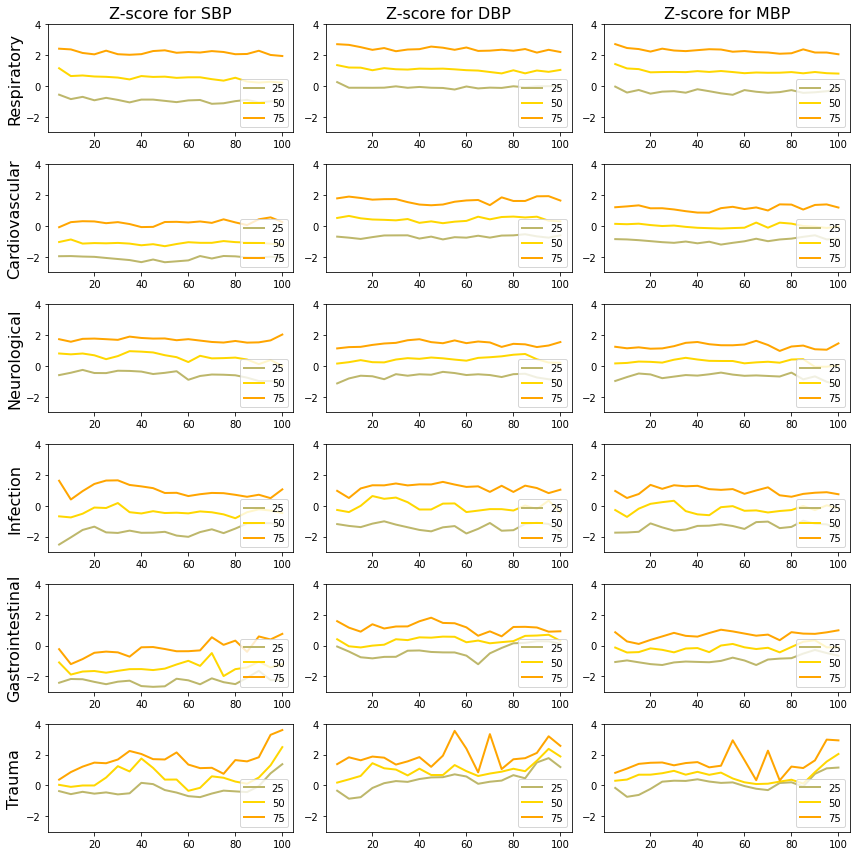

In [8]:
f, ((ax1,ax2,ax3),(ax4,ax5,ax6),(ax7,ax8,ax9),(ax10,ax11,ax12),(ax13,ax14,ax15),(ax16,ax17,ax18)) = plt.subplots(6, 3, figsize=(12,12))
for k in range(1,7):
        if k == 1:
            age_group = 'Respiratory'
            age_label = 'Respiratory'
        elif k ==2:
            age_group = 'Cardiovascular'
            age_label = 'Cardiovascular'
        elif k ==3:
            age_group = 'Neurological'
            age_label = 'Neurological'
        elif k ==4:
            age_group = 'Infection'
            age_label = 'Infection'
        elif k ==5:
            age_group = 'Gastrointestinal'
            age_label = 'Gastrointestinal'
        elif k == 6:
            age_group = 'Trauma'
            age_label = 'Trauma'
        for i in range(1,4):
            if i==1:
                c_VitalSign = 'c_nbpSys'
                vitalSign = 'nnbpSys'
                v_label='SBP'
            elif i==2:
                c_VitalSign = 'c_nbpDia'
                vitalSign = 'nnbpDia'
                v_label='DBP'
            elif i==3:
                c_VitalSign = 'c_nbpMean'
                vitalSign = 'nnbpMean'
                v_label='MBP'
            subNum = (k-1)*3 + i
            axx = locals()['ax' + str(subNum)]  # value stored in variable a
            print("6  3  ",subNum)
            print(age_group + " : " + v_label)
            axx = plt.subplot(6,3,subNum)
            x =  [i*5 for i in range(1,21)]
            p_5,p_25,p_50,p_75,p_95 = get_p_values(create_HR_Progress_List(df,age_group,c_VitalSign,vitalSign))
            axx.plot(x, p_25[:20], label='25',color='darkkhaki',linewidth=2)
            axx.plot(x, p_50[:20], label='50',color='gold',linewidth=2)
            axx.plot(x, p_75[:20], label='75',color='orange',linewidth=2)
            axx.set_ylim([-3, 4])
            if subNum == 1 or subNum == 4 or subNum == 7 or subNum == 10 or subNum == 13 or subNum == 16:
                axx.set_ylabel(age_label, fontsize=16)
            #ax1.set_xlabel('Monitoring time (min)',fontsize=16)
            axx.tick_params(axis ='y')
            if subNum <=3:
                axx.set_title('Z-score for '+ v_label, fontsize=16) 
            plt.tight_layout()
            plt.legend(loc='lower right')
        #plt.ylim(-10,10)